In [5]:
from prophet import Prophet
import pandas as pd
import model_predict
from matplotlib import pyplot as plt

In [6]:
series, scaler = model_predict.read_data_series(scale=True, filter_early=True, file_index=2)

时间序列不连贯，缺失的月份： ['2013-11', '2014-12', '2015-04', '2017-12']
即将填充缺失的月份
月份平均：
月份
1     165.417333
2     107.969333
3      95.301778
4     123.181000
5     154.631111
6     202.507111
7     136.807500
8     117.749000
9     157.433000
10    156.723500
11    156.563429
12    136.816000
Name: 销量（箱）, dtype: float64


In [7]:
series_train = series[:-12]
series_test = series[-12:]

In [8]:
df = pd.DataFrame({'ds': series_train.index, 'y': series_train.values})
# df = pd.DataFrame({'ds': series.index, 'y': series.values})
model = Prophet()
model.fit(df)

04:30:58 - cmdstanpy - INFO - Chain [1] start processing
04:30:58 - cmdstanpy - INFO - Chain [1] done processing


MSE: 19505.08
MAE: 112.08
R^2: -1.62
MAPE: 3.39


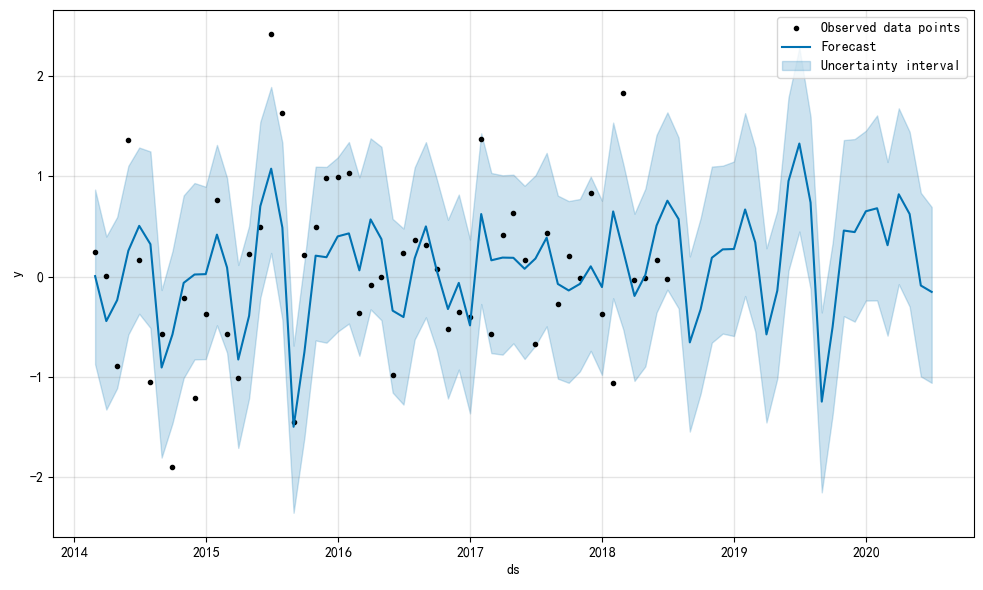

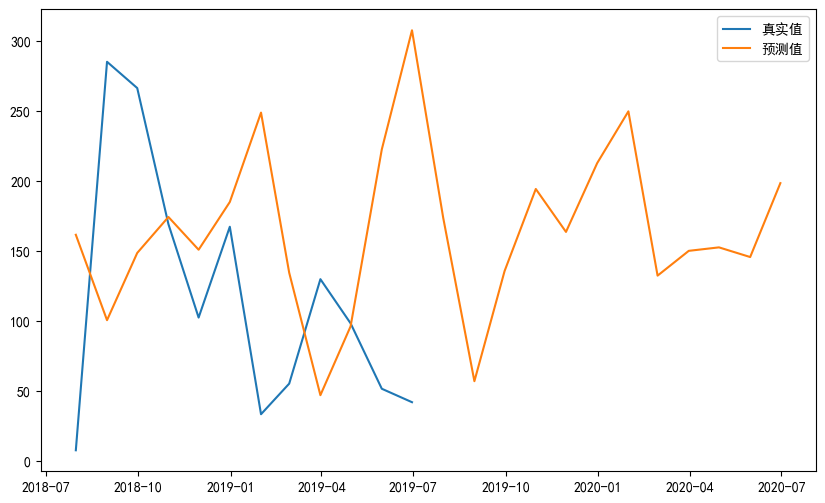

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-02-28,-0.135197,-0.874728,0.868150,-0.135197,-0.135197,0.139966,0.139966,0.139966,0.139966,0.139966,0.139966,0.0,0.0,0.0,0.004769
1,2014-03-31,-0.129877,-1.326167,0.399474,-0.129877,-0.129877,-0.313708,-0.313708,-0.313708,-0.313708,-0.313708,-0.313708,0.0,0.0,0.0,-0.443585
2,2014-04-30,-0.124729,-1.113047,0.594877,-0.124729,-0.124729,-0.109894,-0.109894,-0.109894,-0.109894,-0.109894,-0.109894,0.0,0.0,0.0,-0.234622
3,2014-05-31,-0.119409,-0.577524,1.104995,-0.119409,-0.119409,0.377809,0.377809,0.377809,0.377809,0.377809,0.377809,0.0,0.0,0.0,0.258400
4,2014-06-30,-0.114261,-0.370658,1.287490,-0.114261,-0.114261,0.620692,0.620692,0.620692,0.620692,0.620692,0.620692,0.0,0.0,0.0,0.506431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2020-02-29,0.240955,-0.589021,1.143196,0.240955,0.240955,0.072107,0.072107,0.072107,0.072107,0.072107,0.072107,0.0,0.0,0.0,0.313062
73,2020-03-31,0.246275,-0.076074,1.678783,0.246275,0.246275,0.574912,0.574912,0.574912,0.574912,0.574912,0.574912,0.0,0.0,0.0,0.821186
74,2020-04-30,0.251423,-0.298958,1.444891,0.251423,0.251423,0.373061,0.373061,0.373061,0.373061,0.373061,0.373061,0.0,0.0,0.0,0.624483
75,2020-05-31,0.256742,-0.995724,0.835741,0.256742,0.256743,-0.345668,-0.345668,-0.345668,-0.345668,-0.345668,-0.345668,0.0,0.0,0.0,-0.088926


In [9]:
model_predict.predict_to_future_prophet(model, series, scaler)